In [1]:
# 다중회귀  여러개의 특성을 확보(독립변수)
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung4/ml0719/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9DIII/data.csv')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [16]:
# 넘파이 형태로 변환
import numpy as np
x =  df.to_numpy()
y = np.array( [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
            )

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
# 차수 = 2인 다항식을 만들기 위해 특성을 늘림  ax2 + bx +c
poly = PolynomialFeatures(include_bias=False)
print(poly.fit_transform([[2,3]]))
poly.get_feature_names_out()

[[2. 3. 4. 6. 9.]]


array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [19]:
poly = PolynomialFeatures()
poly.fit_transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])

In [38]:
# 데이터 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,random_state=42)
poly = PolynomialFeatures(include_bias=False) # degree =2
x_train_poly =  poly.fit_transform(x_train)
x_test_poly =  poly.fit_transform(x_test)

In [39]:
x_train.shape, x_train_poly.shape

((42, 3), (42, 9))

In [40]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [41]:
# x가 여러개(다중)
# 특성을 늘렸어요....
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_poly,y_train)

LinearRegression()

In [44]:
lr.score(x_train_poly,y_train), lr.score(x_test_poly,y_test)

(0.9903183436982124, 0.9714559911594131)

In [45]:
# 차수를 높여서 높은 다항식을만들어 봅시다
poly =  PolynomialFeatures(degree=4, include_bias=False)
x_train_poly4 = poly.fit_transform(x_train)
x_test_poly4 = poly.fit_transform(x_test)

In [46]:
x_train_poly4.shape

(42, 34)

In [47]:
lr.fit(x_train_poly4,y_train)

LinearRegression()

In [55]:
lr.score(x_train_poly4,y_train), lr.score(x_test_poly4, y_test)

(0.9995286898074183, -6.7866969324150945)

In [103]:
# 규제 전에 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_poly_scaled =  ss.fit_transform(x_train_poly4)
x_test_poly_scaled =  ss.fit_transform(x_test_poly4)     
lr.fit(x_train_poly_scaled,y_train)
lr.score(x_train_poly_scaled,y_train), lr.score(x_test_poly_scaled, y_test)

(0.999528689807441, -22.49592121729497)

In [104]:
# 선형회귀에서 대표적인 규제 릿지와 랏소
# 랏쏘(LASSO)
# 선형회귀 : 적절한 가중치와 편향 + 제약 MSE가 최소가되도록 .. 즉 절대값의 합이 최소
#가중치가 0이되거나 0에 가깝게 만드는것..... 어떤 특징은 사용되지 않을수 있음

# 릿지(Ridge)
# 가중치가 0에 까가워질뿐이고 0이되지 않는다. ---> 특성 즉 x의값이 전체적으로 비슷하다면. 릿지가 좀더 up

In [105]:
# 릿지
from sklearn.linear_model import Ridge

In [106]:
ridge = Ridge()
ridge.fit(x_train_poly_scaled,y_train)
ridge.score(x_train_poly_scaled,y_train), ridge.score(x_test_poly_scaled, y_test)

(0.9894514463415389, 0.9143890832243826)

In [107]:
# 랏소
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train_poly_scaled,y_train)
lasso.score(x_train_poly_scaled,y_train), lasso.score(x_test_poly_scaled, y_test)

(0.9897257133527957, 0.9148721187540454)

In [108]:
# 최상의 파라메터 찾기
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [109]:
alpha = [0.001,0.01,1.0,1,10,100]
train = []
test = []
for i in alpha:
    ridge = Ridge(alpha=i)
    ridge.fit(x_train_poly_scaled,y_train)
    train.append(ridge.score(x_train_poly_scaled,y_train))
    test.append(ridge.score(x_test_poly_scaled, y_test))

In [110]:
list(zip(train,test))

[(0.9921179995322784, 0.912538436364533),
 (0.9907820655909816, 0.9139485683065753),
 (0.9894514463415389, 0.9143890832243826),
 (0.9894514463415389, 0.9143890832243826),
 (0.9890477554300571, 0.9152540045609621),
 (0.9841899617371359, 0.9231240930272585)]

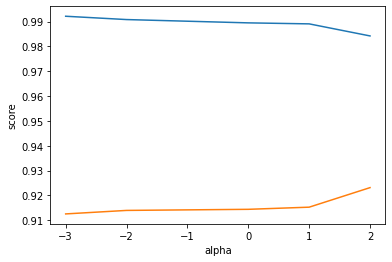

In [111]:
import matplotlib.pyplot as plt
plt.plot(np.log10(alpha),train)
plt.plot(np.log10(alpha),test)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

In [112]:
alpha, np.log10(alpha)

([0.001, 0.01, 1.0, 1, 10, 100], array([-3., -2.,  0.,  0.,  1.,  2.]))

In [113]:
#랏소 파라메터 확인
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [120]:
# 랏소 최상의 조건 찾기
alpha = [0.001,0.01,1.0,1,10,100]
train = []
test = []
for i in alpha:    
    lasso = Lasso(alpha=i,max_iter= 10000)
    lasso.fit(x_train_poly_scaled,y_train)    
    train.append(ridge.score(x_train_poly_scaled,y_train))
    test.append(ridge.score(x_test_poly_scaled, y_test))

C:\Users\user\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.103e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.306e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


In [121]:
list(zip(train, test))

[(0.9841899617371359, 0.9231240930272585),
 (0.9841899617371359, 0.9231240930272585),
 (0.9841899617371359, 0.9231240930272585),
 (0.9841899617371359, 0.9231240930272585),
 (0.9841899617371359, 0.9231240930272585),
 (0.9841899617371359, 0.9231240930272585)]

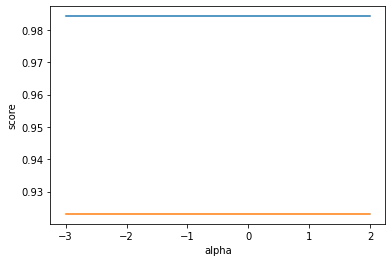

In [122]:
import matplotlib.pyplot as plt
plt.plot(np.log10(alpha),train)
plt.plot(np.log10(alpha),test)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()